### Option Price ($K_1$ & $K_2$) using Monte-Carlo (B&S) 

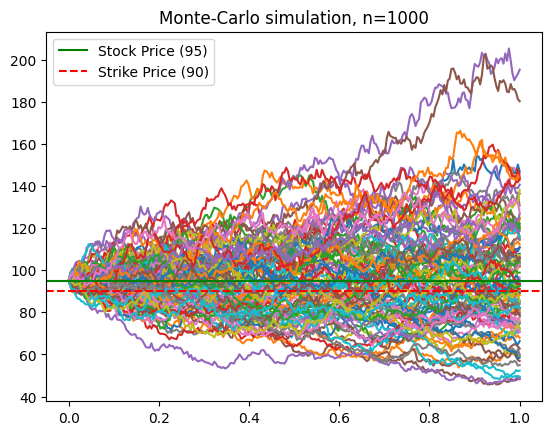

4.783029127893105

In [10]:
def option_MC(option_prices,T,dt,j,r):
    x = np.exp(-r*(T-j*dt))*np.mean(option_prices)
    return x

NMC = 100
Nt = 252
t = np.linspace(0,T,Nt)
dt = T/Nt

meana=[] # vector used for averaging on all the results, for better accuracy.

for l in range(100): # loop for 100 option prices that will be averaged

    S = np.zeros([NMC,Nt]) # array for stock prices
    S[:,0] = S0
    
    for j in range(0, Nt-1):
        S[:,j+1] = S[:,j]*np.exp((r-sigma**2/2)*dt + sigma*np.sqrt(dt)*np.random.normal(0,1, NMC))

for i in range(0,NMC):
    plt.plot(t,S[i,:])
plt.axhline(S0, color='green', label='Stock Price (95)')
plt.axhline(K, color='red',linestyle = 'dashed', label='Strike Price (90)')
plt.legend()
plt.title('Monte-Carlo simulation, n=1000')
plt.show()

ST = S[:, -1]  # final price

option_prices = np.zeros(NMC)  # vector to store option prices
for i in range(NMC):
    if ST[i] >= K + 10:
        option_prices[i] = 10
    elif ST[i] <= K:
        option_prices[i] = 0
    else:
        option_prices[i] = ST[i] - K
        
meana.append(option_MC(option_prices,T,dt,0,r))
# end loop for all the option prices

np.mean(meana)

# Pricing of GMAB and GMDB

### Question 1

Analytical expressions of the GMAB at time t ≤ T:

 - using call and put options:

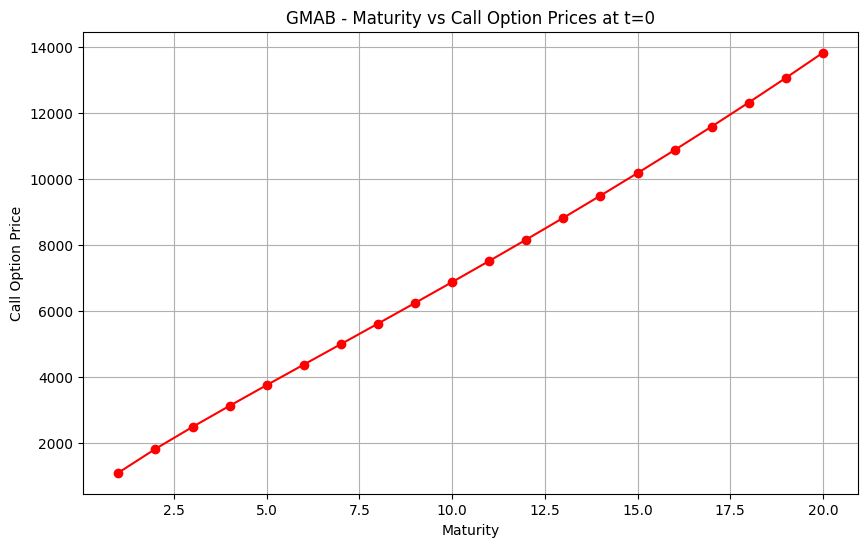

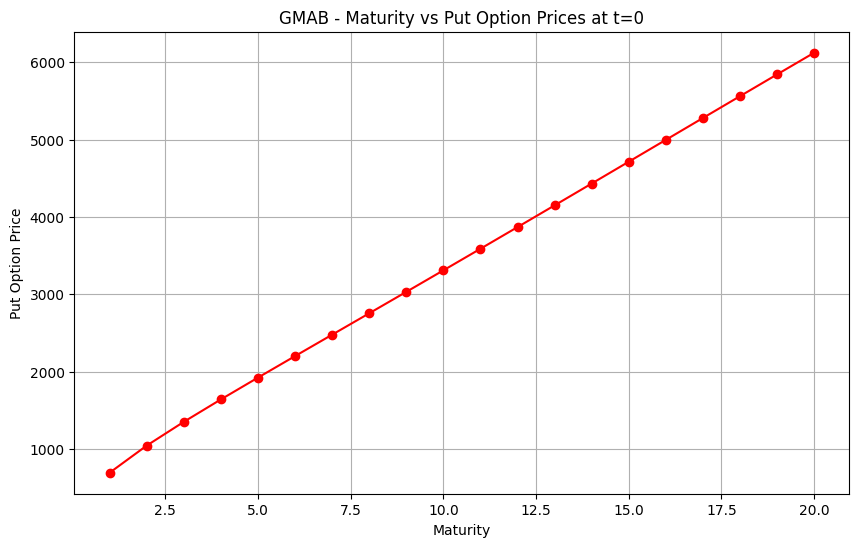

In [21]:
import numpy as np
from scipy.stats import norm
import pandas as pd
import matplotlib.pyplot as plt


def black_scholes(S, K1, K2, T, r, sigma, option_type='call'):
    """
    Calculate the Black-Scholes option price.

    Parameters:
        S (float): Current price of the underlying asset
        K1 (float): Lower Strike price
        K2 (float): Upper Strike price
        T (float): Time to maturity (in years)
        r (float): Risk-free interest rate (annualized)
        sigma (float): Volatility of the underlying asset (annualized)
        option_type (str): Type of the option, either 'call' or 'put' (default is 'call')

    Returns:
        float: The Black-Scholes option price
    """
    
    d11 = (np.log(S / K1) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d12 = d11 - sigma * np.sqrt(T)

    d21 = (np.log(S / K2) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d22 = d21 - sigma * np.sqrt(T)

       
    
    if option_type == 'call':
        # (S=K2 * probability values sum S above K2) + (S=S * probability values sum S between K1 and K2) - (discounted K1 * probability sum S above K1)
        option_price = K2 * norm.cdf(d21) + S*(norm.cdf(-d21) - norm.cdf(-d11)) - np.exp(-r * T) * K1 * norm.cdf(d12)
   
    
    elif option_type == 'put':
        # (discounted K2 * probability sum S below K2) - (S=K2 * probability values sum S above K2) + (S=S * probability values sum S between K1 and K2) -
        option_price = np.exp(-r * T) * K2 * norm.cdf(-d22) - S*(norm.cdf(-d21) - norm.cdf(-d11)) - K1 * norm.cdf(-d11)    
    
    else:
        raise ValueError("Option type must be either 'call' or 'put'")
    

    return option_price

# Example usage
S = 10000                                     
r = 0.045                    
sigma = 0.16  


call_prices, put_prices = [],[]
maturities = range(1,21)   
for T in maturities:
    K1 = 10000*np.exp(0.02 * T)   
    K2 = 10000*np.exp(0.07 * T)    

    suvival_prob = np.exp(-0.002*T-0.00025*T**2)
    call_price = black_scholes(S, K1, K2, T, r, sigma, option_type='call')
    call_prices.append(suvival_prob*call_price)
    put_price = black_scholes(S, K1, K2, T, r, sigma, option_type='put')
    put_prices.append(suvival_prob*put_price)

# Plot Call Option Prices
plt.figure(figsize=(10, 6))
plt.plot(maturities, call_prices, marker="o", color='red')
plt.xlabel('Maturity')
plt.ylabel('Call Option Price')
plt.title('GMAB - Maturity vs Call Option Prices at t=0')
plt.grid(True)
plt.show()

# Plot Put Option Prices
plt.figure(figsize=(10, 6))
plt.plot(maturities, put_prices,  marker="o", color='red')
plt.xlabel('Maturity')
plt.ylabel('Put Option Price')
plt.title('GMAB - Maturity vs Put Option Prices at t=0')
plt.grid(True)
plt.show()

In [22]:
put_prices

[696.4113893079717,
 1046.6922731260022,
 1353.5783135698302,
 1643.1523691634118,
 1924.7259374582036,
 2202.630191724611,
 2479.138299609472,
 2755.5068597525014,
 3032.4290223314733,
 3310.2590945322513,
 3589.1347681491125,
 3869.048531070186,
 4149.891819827644,
 4431.483629495807,
 4713.589813017166,
 4995.936570900721,
 5278.220189059287,
 5560.114281286923,
 5841.275328951374,
 6121.347032005909]

### Question 2

Binomial tree to price a GMAB of maturity T=8 years

### Question 3

Analytical expressions of the GMDB at time t ≤ T:

- using call options:

- using put options:

### Question 4

Binomial tree to price a GMDB of maturity T=8 years

97.52703280679253

# Pricing of a maximum return insurance

In [25]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import pandas as pd

### Question 1

From the file "Data_project.xlsx": 

In [26]:
def import_excel(file_path):
    ''' Imports xlxs file in the provided path.'''
    try:
        # Read the Excel file into a pandas DataFrame
        df = pd.read_excel(file_path)
        
        # Check if the required columns are present
        required_columns = ['Date']
        if not all(column in df.columns for column in required_columns):
            raise ValueError("Required columns are missing in the Excel file.")
        return df

    except FileNotFoundError:
        print("File not found. Please provide a valid file path.")
    except Exception as e:
        print("An error occurred:", e)

# Import .xlsx file containing date and indexes columns closing values. Example ['Date', "Eurxx50", "Amex"] 
file_path = "/mnt/c/buildbr/finance-stochastic-24/data/Data_project.xlsx" 
data = import_excel(file_path)

In [27]:
def calculate_daily_return(df):
    ''' Calculate the returns, avg, and std for each index-column.'''

    avg_return_idx = []
    std_return_idx = []

    cols = df.columns[1:]

    [col for col in df.columns if 'return' in col]
    for col in cols:
        df[f'return_{col}'] = df[col].pct_change()
        avg_return_idx.append(df[f'return_{col}'].mean())
        std_return_idx.append(df[f'return_{col}'].std())

    return cols, avg_return_idx, std_return_idx

def calculate_returns_corr(df):
    ''' Calculate the return correlation of the indexes.'''

    return_columns = [col for col in df.columns if 'return' in col]
    df_return = df[return_columns]
    return_corr_matrix = df_return.corr()

    correlation = df['return_Amex'].corr(df['return_Eurxx50'])
    cov_matrix = df[return_columns].cov()
    
    return return_corr_matrix, correlation, cov_matrix

if data is not None:
    # Calculate returns
    indexes, avg_returns, std_returns = calculate_daily_return(data)
    # Calculate returns correlation
    corr_matrix, correlation, cov_matrix = calculate_returns_corr(data) # check with slides

- Daily returns of each indice

In [33]:
print(data.sample(10))

          Date      Eurxx50         Amex  return_Eurxx50  return_Amex
235 2023-01-11  4099.759766  4134.220215        0.010425     0.006160
139 2022-08-26  3603.679932  4408.700195       -0.019284    -0.014177
319 2023-05-12  4317.879883  3963.629883        0.001886     0.001620
377 2023-08-07  4337.500000  4328.770020        0.001059    -0.004933
278 2023-03-13  4096.540039  4131.109863       -0.031443    -0.015624
151 2022-09-13  3586.179932  4273.419922       -0.016545    -0.001115
129 2022-08-12  3776.810059  4219.640137        0.005259     0.013180
203 2022-11-24  3961.989990  4660.569824        0.003940     0.000000
107 2022-07-12  3487.050049  3645.929932        0.004424    -0.007967
310 2023-04-28  4359.310059  4199.500000        0.000289     0.002028


- Averages, standard deviations and correlation of daily returns.

In [34]:
for idx, col in enumerate(indexes):
        print(f'The daiy return average and std deviaton for the {col} are: {round(avg_returns[idx]*100,3)}% and {round(std_returns[idx],3)}')
print(f'The correlation is rho : {round(correlation,3)}')
print(f'The covariance matrix M:')
print(cov_matrix)
print(f'The Choleski decomposition of M:')
np.linalg.cholesky(cov_matrix)

The daiy return average and std deviaton for the Eurxx50 are: 0.032% and 0.012
The daiy return average and std deviaton for the Amex are: 0.046% and 0.015
The correlation is rho : 0.306
The covariance matrix M:
                return_Eurxx50  return_Amex
return_Eurxx50        0.000147     0.000057
return_Amex           0.000057     0.000236
The Choleski decomposition of M:


array([[0.01210911, 0.        ],
       [0.00470035, 0.01462035]])

- Calculate the annual standard deviations, annual returns and covariance
matrix.

In [35]:
for idx, col in enumerate(indexes):
        print(f'The annual return average and std deviaton for the {col} are: {round(avg_returns[idx]*252*100,3)}% and {round(std_returns[idx]* np.sqrt(252),3)}')

The annual return average and std deviaton for the Eurxx50 are: 7.959% and 0.192
The annual return average and std deviaton for the Amex are: 11.686% and 0.244


$$
\text{Cov}(X,Y) = 
\begin{bmatrix}
\sigma_1^2 & \rho \sigma_1 \sigma_1 \\
\rho \sigma_1 \sigma_2 & \sigma_2^2 \\
\end{bmatrix}
$$


In [36]:

cov_matrix_Y = np.array([[round(std_returns[0]* np.sqrt(252),3)**2, round(std_returns[0]* np.sqrt(252),3)*round(std_returns[1]* np.sqrt(252),3)*correlation],
                           [round(std_returns[0]* np.sqrt(252),3)*round(std_returns[1]* np.sqrt(252),3)*correlation, round(std_returns[1]* np.sqrt(252),3)**2]])
print(f'The annualized covariance matrix M:')
print(cov_matrix_Y)


The annualized covariance matrix M:
[[0.036864   0.01433856]
 [0.01433856 0.059536  ]]


$$
\text{$\Sigma$} = 
\begin{bmatrix}
\sigma_1 & 0 \\
\rho \sigma_2  & \sqrt{1 -\rho} \sigma_2 \\
\end{bmatrix}
$$

In [37]:
print(f'The annualized Choleski decomposition of M:')
Cholesky = np.linalg.cholesky(cov_matrix_Y)
print(Cholesky)

The annualized Choleski decomposition of M:
[[0.192      0.        ]
 [0.07468    0.23229055]]


### Question 2
The interest rate is equal r = 3.75% and the maturity is T. Using the parameters estimated from Q1, evaluate the maximum return insurance with a
closed form expression (present and brifly comment it) for T = 1, 2, ...10 years (t = 0).

1 16553
2 17190
3 17675
4 18080
5 18434
6 18751
7 19040
8 19307
9 19556
10 19789


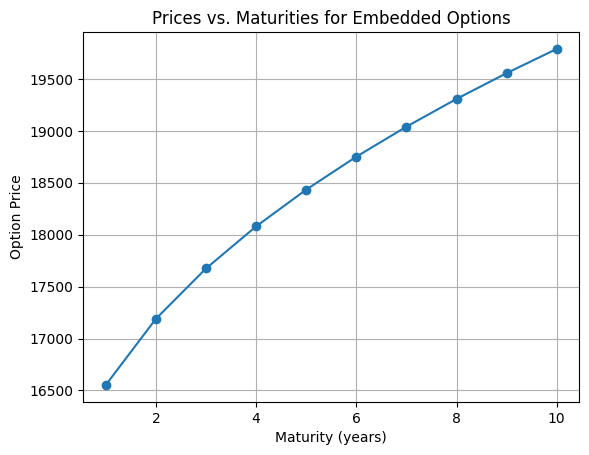

In [38]:
def embedded_options_max_return_closed_form_black_scholes(S1, S2, r, t, T, choleski):
    """
    Calculate the Black-Scholes option price with an embedded max return feature in a closed form.

    Parameters:
        S1 (float): Current price of the first underlying asset
        S2 (float): Current price of the second underlying asset
        T (float): Time to maturity (in years)
        choleski: The Cholesky decomposition of the covariance matrix 

    Returns:
        float: The Black-Scholes option price with an embedded max return feature
    """
  
    # Calculate the parameters for the log-normal distribution (slide 191)
    ut = -(choleski[1,1]**2+(choleski[1,0]-choleski[0,0])**2)*T/2
    vt = np.sqrt((choleski[1,1]**2+(choleski[1,0]-choleski[0,0])**2)*T)
    # Black-Scholes parameters with max return feature
    d2 = (np.log(S1 / S2) - ut)/vt
    d1 = d2 - vt

    # Analytical formula for the option price 
    option_price = S2 * norm.cdf(-d1) - S1 * norm.cdf(-d2) + S1 * np.exp(-r * t)

    return option_price

Maturities = range(1,11) 

# # Example slide 192
# S1 = 100     # Current price of the first underlying asset
# S2 = 100     # Current price of the second underlying asset
# r = 0.04
# t= 0
# cho =  np.array([[0.25, 0],
#                    [0, 0.3]])

# Project exercise 2
S1 = 15000   # Current price of the first underlying asset
S2 = 15000   # Current price of the second underlying asset
r = 0.0375
t= 0
cho =  Cholesky
option_prices = []
for T in Maturities:
    option_price_t = embedded_options_max_return_closed_form_black_scholes(S1, S2, r, t, T, cho)
    option_prices.append(option_price_t)
    print(T, round(option_price_t))

# Plotting
plt.plot(Maturities, option_prices, marker='o')
plt.title('Prices vs. Maturities for Embedded Options')
plt.xlabel('Maturity (years)')
plt.ylabel('Option Price')
plt.grid(True)
plt.show()

### Question 3
Price the contract by Monte-Carlo simulations for T = 1, 2, ...10 years. Compare your results with those obtained with the closed-form expression. Test different steps of time and check the convergence.

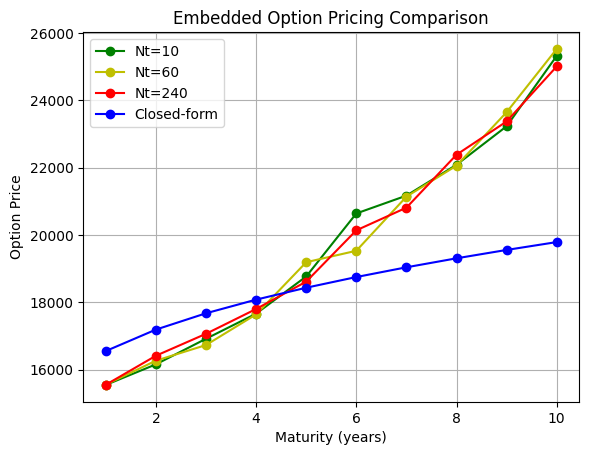

In [40]:
import numpy as np

def simulate_asset_paths(num_simulations, initial_prices, mu, sigmas, covariance_matrix, Nt, T, r):
    payoffs = []
    num_assets = len(mu)

    for _ in range(num_simulations):
        asset_paths = np.zeros((num_assets, Nt + 1))
        asset_paths[:, 0] = initial_prices        

        dt = T / Nt
        cholesky_factor = np.linalg.cholesky(covariance_matrix)

        # Euler discretization
        for t in range(Nt):
            e = np.random.randn(num_assets) # e drawn from N(0,1)
            correlated_shocks = np.dot(cholesky_factor, e) 

            # calculate the next step "j" for each asset "i"
            for i in range(num_assets):

                # Discrete : S_j = S_{j-1} + S_{j-1}[r*dt + sigma*sqrt(dt)*e] (slide 211)

                # drift = mu[i]* dt # r_i*dt                  
                # volatility = sigmas[i] * np.sqrt(dt) * e[i] # sigma_i*dt*e
                
                
                # asset_paths[i, t + 1] = asset_paths[i, t] + asset_paths[i, t]*(drift + volatility)

                #Continuous: S_j = S_{j-1}*exp( r*dt + sigma*sqrt(dt)*e) 

                drift = (mu[i] -(sigmas[i]**2)/2)* dt # r_i*dt                  
                volatility = sigmas[i] * np.sqrt(dt) * e[i] # sigma_i*dt*e

                asset_paths[i, t + 1] = asset_paths[i, t] * np.exp(drift + volatility)

        payoff = asset_paths[1, -1] - asset_paths[0, -1]  # (S1_m - S2_m) for path "k"
        
        discounted_payoff = payoff * np.exp(-r * T)  # Discount payoff for the path "k" 
        payoffs.append(discounted_payoff)  # append the discounted payoff value for the path "k"

    average_payoff = np.mean(payoffs)  # Average all the K simulated paths
    return average_payoff 

# Index parameters
initial_prices = np.array([15000, 15000]) # So of each assets
mu = [0.0795855038775904, 0.11685699664594781] # annual average return of each index
sigmas = [0.19222624067232394, 0.24379018901142985] # annual volatility of each index
covariance_matrix = cov_matrix_Y


# Simulations parameters
num_paths = 4000 # number of paths to be simulated
maturities = range(1,11)  # in years
Nts = [10, 60, 240] # number of time steps
r = 0.0375   # risk free rate for PV discount


payoff_steps = []
for Nt in Nts:
    average_payoffs = []
    for T in maturities:
    # Simulate asset paths and calculate average payoff
        average_payoff = simulate_asset_paths(num_paths, initial_prices, mu, sigmas, covariance_matrix, Nt, T, r)
        average_payoffs.append(average_payoff + 15000)
    payoff_steps.append(average_payoffs)

 
# Plotting
plt.plot(Maturities, payoff_steps[0], marker='o', color='g', label=f'Nt={Nts[0]}')
plt.plot(Maturities, payoff_steps[1], marker='o', color='y', label=f'Nt={Nts[1]}')
plt.plot(Maturities, payoff_steps[2], marker='o', color='r', label=f'Nt={Nts[2]}')
plt.plot(Maturities, option_prices, marker='o', color='b', label='Closed-form')
plt.title(f'Embedded Option Pricing Comparison')
plt.xlabel('Maturity (years)')
plt.ylabel('Option Price')
plt.legend()
plt.grid(True)
plt.show()


### Question 4
We assume that in case of death before expiry, the inheritor will receive the maximum between the initial premium (15 000€) and the funds
tracking the Eurostoxx 50 and the AMEX. Evaluate this death insurance for T = 1, 2, ...10 years, using Monte-Carlo simulations. Test different steps of time and check the convergence.

# Extra

### PDE Implicit method

The value of alpha is 10.356693121127789


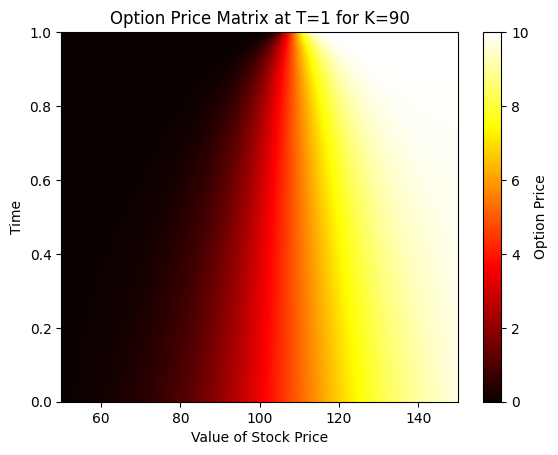

In [ ]:
T =1
N = 200000

K=90
So = 95
upper_So = 150
lower_So = 50

M= 500

xmax = np.log(upper_So/So)
xmin = np.log(lower_So/So)


# the time step must be small than 1
dt = T/N
h = (xmax-xmin)/M
print('The value of alpha is',dt/h**2) # making sure we have the stability condition


# The constants for the equation
b = r*dt + 1 + dt*(sigma/h)**2
c = -r*dt/(2*h) - dt/(2*h)*(sigma**2)*(1/h-1/2)
a = c + (r-(sigma**2)/2)/h*dt


# Define the arrays for the stock price and time
x = np.linspace(xmin, xmax, M+1)
t = np.linspace(0, T, N+1)

# Define the initial and boundary conditions
V = np.zeros((N+1, M+1))
q=np.maximum(0,S0 * np.exp(x) - K)
V[N, :] = np.minimum(q, 10)

V[:, 0] = 0

for j in range(N+1):
    if S0*np.exp(xmax) >= K + 10:
        V[j,M] = 10* np.exp(-r*(T-j*dt))
    elif S0*np.exp(xmax) <= K:
        V[j,M] = 0
    else:
        V[j,M] = (S0*np.exp(xmax) - K)* np.exp(-r*(T-j*dt))

# Solve the equation using the explicit method

A = np.zeros((M-1, M-1))
for i in range(M-1):
    A[i, i] = b
    if i > 0:
        A[i, i-1] = a
    if i < M-2:
        A[i, i+1] = c

W = np.zeros((M-1)) # vector of boundary conditions

for i in range( N-1,-1,-1): # going backwards

    W[0] = -a * V[i,0]
    W[-1] = -c * V[i,-1]
    # Solve the matrix equation for V
    V[i,1:M] = np.dot(np.linalg.inv(A), V[i+1,1:M] + W)


# Plot the matrix
plt.imshow(V, origin='lower', extent=[50, 150, 0, 1], cmap='hot', aspect='auto')
plt.colorbar(label='Option Price')
plt.xlabel('Value of Stock Price')
plt.ylabel('Time')
plt.title(f'Option Price Matrix at T={T} for K={K}')
plt.show()

### PDE Explicit method

The value of alpha is 0.9552526361134334


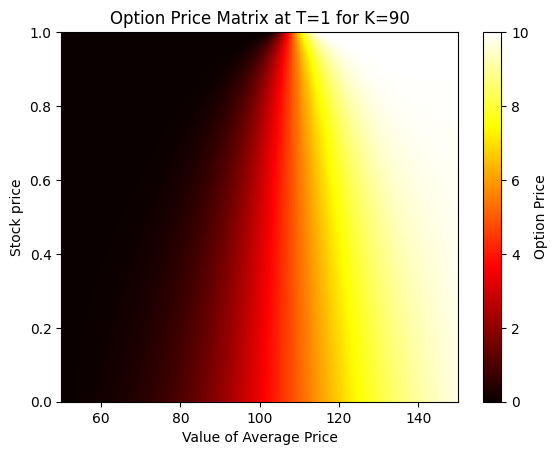

In [ ]:
T =1
N = 200000

K=90
So = 95
upper_So = 150
lower_So = 50

M= 500

xmax = np.log(upper_So/So)
xmin = np.log(lower_So/So)


# Define the time and spatial step sizes
dt = T / N
h = (xmax - xmin) / M
print('The value of alpha is',dt/h**2) # making sure we have the stability condition

# Define the arrays for the stock price and time
x = np.linspace(xmin, xmax, M+1)
t = np.linspace(0, T, N+1)

# Define the initial and boundary conditions
V = np.zeros((N+1, M+1))
q=np.maximum(0,S0 * np.exp(x) - K)
V[N, :] = np.minimum(q, 10)
V[:, 0] = 0

for j in range(N+1):
    if S0*np.exp(xmax) >= K + 10:
        V[j,M] = 10* np.exp(-r*(T-j*dt))
    elif S0*np.exp(xmax) <= K:
        V[j,M] = 0
    else:
        V[j,M] = (S0*np.exp(xmax) - K)* np.exp(-r*(T-j*dt))
    # V[j,M] = 10

# Define the coefficients of the discretized equation

ce = ( 0.5 * r/h + (1/h - 1/2)* 0.5/h * sigma**2)*dt / (1+r*dt)
be = (1 -  dt * sigma**2/h**2) / (1+r*dt)
ae = (- 0.5 * r/h + (1/h + 1/2)* 0.5/h * sigma**2)*dt / (1+r*dt)

# Solve the equation using the explicit method
for i in range( N-1,-1,-1):

    for j in range(1, M):

        V[i, j] = ae*V[i+1, j-1] + be * (V[i+1, j]) + ce * (V[i+1, j+1] )

# for i in range(M+1):
#
#     plt.plot(t,V[:,i])
# plt.show()

# print("Option value at time 0: ", V[0, :])
# print("Option value at maturity T: ", V[N, :])
# Plot
plt.imshow(V, origin='lower', extent=[50, 150, 0, 1], cmap='hot', aspect='auto')
plt.colorbar(label='Option Price')
plt.xlabel('Value of Average Price')
plt.ylabel('Stock price')
plt.title(f'Option Price Matrix at T={T} for K={K}')
plt.show()

In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt


### European Binomial tree (Slide 63)

In [123]:
def eur_payoff_probability_sum(n, p, So, u, d, k):
    """
    Calculate the sum of probabilities in a binomial distribution
    up to a specified number of successes.

    Parameters:
        n (int): Number of step.
        So (int): Initial stock price.
        u (float): potential increase of So.
        d (float): potential decrease of So.
        k (int): strike price of the option for payoff        

    Returns:
        float: Sum of probabilities for up to j successes.
    """
    call_sum_prob, put_sum_prob = 0, 0

    for j in range(n + 1):

        call_payoff_j = np.maximum(So*(u**j)*d**(n-j) - k, 0)

        put_payoff_j = np.maximum(k - So*(u**j)*d**(n-j), 0)

        prob_j = math.comb(n, j) * (p ** j) * ((1 - p) ** (n - j))
        
        call_sum_prob += prob_j*call_payoff_j

        put_sum_prob += prob_j*put_payoff_j

    return call_sum_prob, put_sum_prob

def binomial_tree_european_options(So, r, T, k, sigma, Nt):
    """
    Calculate the sum of probabilities in a binomial distribution
    up to a specified number of successes.

    Parameters:
        So (int): Initial stock price.
        r (float): Risk free rate (Neutral Risk).
        T (int): Maturity.
        Nt (int): Number of step.
        k (int): Strike price of the option for payoff. 
        sigma (float): Standard deviations. 
    Returns:
        Call (float): Option price for call
        Put (float): Option price for put
    """

    step = T/Nt # Maturity divided by the number of step

    # how to choose u & d:
    u = np.exp((r-(sigma**2)/2)*step + sigma*np.sqrt(step))
    d = np.exp((r-(sigma**2)/2)*step - sigma*np.sqrt(step))

    # how to calculate p (for neutral risk Q):
    p = (np.exp(r*step)-d)/(u-d)

    C_prob, P_prob = eur_payoff_probability_sum(Nt, p, So, u, d, k)

    # option price at t=0
    Call =np.exp(-r*T)*C_prob
    Put =np.exp(-r*T)*P_prob

    return Call, Put

So = 100
r = 0.06
T = 5
k = 100
sigma = 0.25
Nt_values = range(10, 400, 10) # Varying number of steps

for Nt in Nt_values:
    prices = binomial_tree_european_options(So, r, T, k, sigma, Nt)

### American Binomial tree (Slide 65)

In [142]:
def binomial_tree_european_options(So, r, T, k, sigma, Nt):


def binomial_tree_american_options(So, r, T, k, sigma, Nt):
    """
    Calculate the sum of probabilities in a binomial distribution
    up to a specified number of successes.

    Parameters:        
        So (int): Initial stock price.
        r (float): risk free rate (Neutral Risk).
        T (int): Maturity.
        n (int): Number of step.
        k (int): strike price of the option for payoff.
        sigma (float): standar deviations.    
    Returns:
        Call (float): Option price for call FIXXX
        Put (float): Option price for put  FIXXX
    """

    # define steps the time length: Maturity divided by the number of step
    step = T/Nt

    # how to choose u & d:
    u = np.exp((r-(sigma**2)/2)*step + sigma*np.sqrt(step))
    d = np.exp((r-(sigma**2)/2)*step - sigma*np.sqrt(step))

    # how to calculate p (for neutral risk Q):
    p = (np.exp(r*step)-d)/(u-d)
       
    # Initialize option prices
    option_prices = np.zeros((2, number_of_steps + 1))  # 2 rows for call and put options

    # Initialize stock prices at each step
    stock_prices = np.zeros((number_of_steps + 1, number_of_steps + 1)) # matrix of stokc prices for possible steps

    # Calculate stock prices at each step
    for i in range(number_of_steps + 1):
        for j in range(i + 1):
            stock_prices[j, i] = So * (u ** (i - j)) * (d ** j)


    
    for j in range(number_of_steps): # Calculate option values at each earlier step
        for i in range(j + 1): # check possible values at step_j (superior diagonal of the matrix)                       

            # Calculate early exercise values for put and call options based on current stock price
            early_exercise_put = np.maximum(K - stock_prices[i, j], 0) # moment t
            early_exercise_call = np.maximum(stock_prices[i, j] - K, 0) # moment t

            # Calculate stock price movement and option value at step ahead (u & d) for call             
            up = stock_prices[i, j+1]
            down = stock_prices[i+1, j+1]
            ### -> analyse it
            payoff_put_up = np.maximum(K - up, 0) # fuu
            payoff_put_down = np.maximum(K - down, 0) # fud

            payoff_call_up = np.maximum(up - K, 0) # fuu 
            payoff_call_down =np.maximum(down - K, 0) # fud 


            # Calculate continuation values for put and call options based on expected future payoff
            continuation_put = np.exp(-r * step) * (p * payoff_put_up + (1 - p) * payoff_put_down)    # moment t+1
            continuation_call = np.exp(-r * step) * (p * payoff_call_up + (1 - p) * payoff_call_down) # moment t+1

            # Update option prices based on early exercise and continuation values
            option_prices[0, i] = max(early_exercise_put, continuation_put)
            option_prices[1, i] = max(early_exercise_call, continuation_call)
        
    return payoffs[0, -1], payoffs[1, -1]


So = 100
r = 0.06
T = 5
k = 100
sigma = 0.25
Nt_values = range(10, 400, 10) # Varying number of steps

for Nt in Nt_values:
    prices = binomial_tree_american_options(So, r, T, k, sigma, Nt)


In [51]:
import numpy as np

def binomial_tree_european_options(So, r, T, k, sigma, Nt):
    pass

def american_fast_tree(So, r, T, K, N, sigma, Nt, opttype='P'):
    #precompute values
    dt = T/N

    # how to choose u & d:
    u = np.exp((r-(sigma**2)/2)*dt + sigma*np.sqrt(dt))
    d = np.exp((r-(sigma**2)/2)*dt - sigma*np.sqrt(dt))


    q = (np.exp(r*dt) - d)/(u-d)
    disc = np.exp(-r*dt)

    # initialise stock prices at maturity
    S = So * d**(np.arange(N,-1,-1)) * u**(np.arange(0,N+1,1))

    # option payoff
    if opttype == 'P':
        C = np.maximum(0, K - S)
    else:
        C = np.maximum(0, S - K)

    # backward recursion through the tree
    for i in np.arange(N-1,-1,-1):
        S = So * d**(np.arange(i,-1,-1)) * u**(np.arange(0,i+1,1))
        
        
        P[:i+1] = disc * ( q*C[1:i+2] + (1-q)*C[0:i+1] )
        P = P[:-1]
        P = np.maximum(P, K - S)

        C[:i+1] = disc * ( q*C[1:i+2] + (1-q)*C[0:i+1] )
        C = P[:-1]
        C = np.maximum(C, S - K)
        
        if opttype == 'P':
            C = np.maximum(C, K - S)
        else:
            C = np.maximum(C, S - K)

    return C[0]



# Example usage:
sigma = 0.25
T = 5
So = 100
K = 100
r = 0.06
Nt_values = range(10, 400, 10) # Varying number of steps

for Nt in Nt_values:
    prices = american_fast_tree(So, r, T, K, Nt, sigma, Nt, opttype='P')
    print(prices)

12.377700246795108
12.456665287922872
12.439963952714736
12.382967717587334
12.40913312074147
12.366704276937591
12.397231775357396
12.401902577890244
12.405467660391592
12.424378229581874
12.417417700791725
12.422513835504779
12.43140468134138
12.425711399732922
12.42531650310116
12.429703972510705
12.428959808748422
12.423995855331077
12.423913807613367
12.425336180854416
12.42308674232361
12.41907291255095
12.418044052134437
12.41772035662228
12.418417988825722
12.417878412804862
12.419510165317451
12.42170443744333
12.423633969323333
12.424098620088232
12.424293830855497
12.425540414852328
12.426664824231871
12.427436546710611
12.42737549707522
12.42726970338557
12.427903678364677
12.428382847756195
12.428567039429923


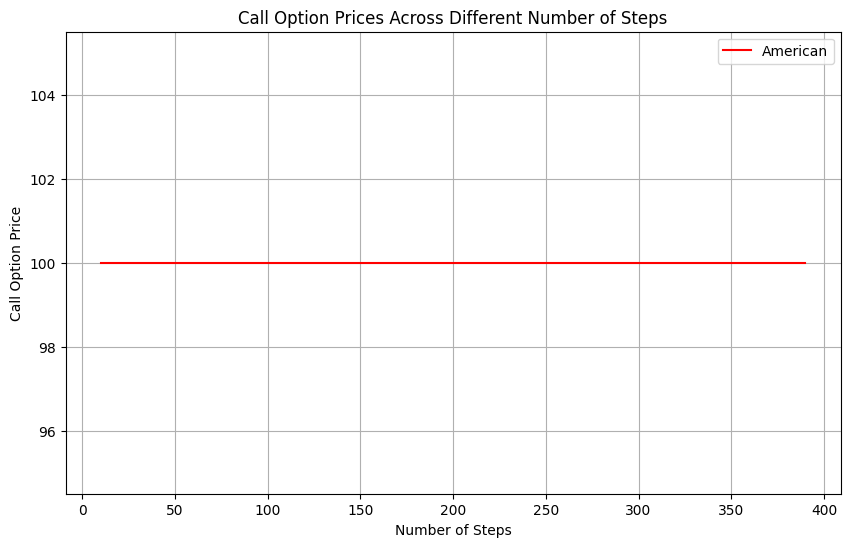

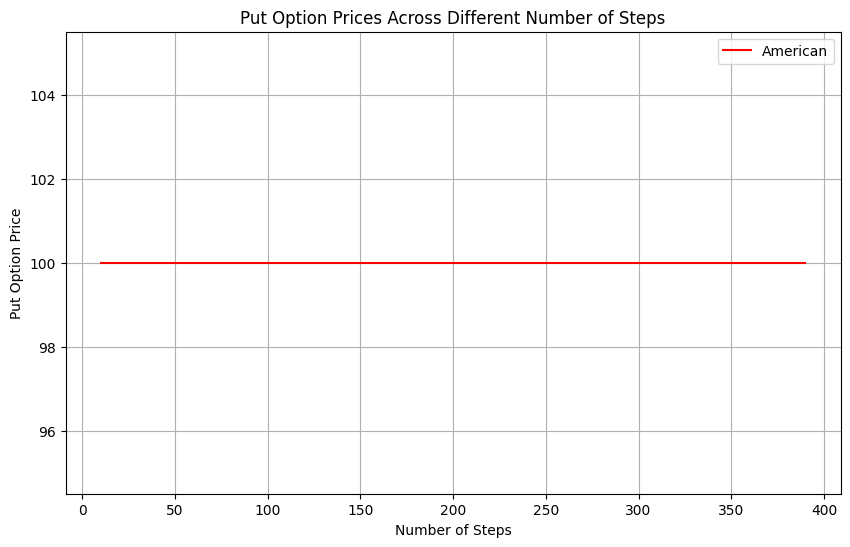

In [141]:
def plot_option_prices(So, r, T, k, sigma, Nt_values):
    
    prices = [[] for j in range(4)] # 4: call_ame, call_ame, call_eur, put_eur
    

    for Nt in Nt_values:
        call_ame, put_ame = binomial_tree_american_options(So, r, T, k, sigma, Nt)
        call_eur, put_eur = binomial_tree_european_options(So, r, T, k, sigma, Nt)
        prices[0].append(call_ame)
        prices[1].append(put_ame)
        prices[2].append(call_eur) 
        prices[3].append(put_eur)
    
    
    # Plot Call Option Prices
    plt.figure(figsize=(10, 6))
    plt.plot(Nt_values, prices[0], color='red', label='American')
    # plt.plot(Nt_values, prices[2], color='blue', linestyle='dashed', label='European')
    plt.xlabel('Number of Steps')
    plt.ylabel('Call Option Price')
    plt.title('Call Option Prices Across Different Number of Steps')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plot Put Option Prices
    plt.figure(figsize=(10, 6))
    plt.plot(Nt_values, prices[1], label='American', color='red')
    # plt.plot(Nt_values, prices[3], color='blue', linestyle='dashed', label='European')
    plt.xlabel('Number of Steps')
    plt.ylabel('Put Option Price')
    plt.title('Put Option Prices Across Different Number of Steps')
    plt.legend()
    plt.grid(True)
    plt.show()

    return prices


So = 100
r = 0.06
T = 5
Nt_values = range(10, 400, 10) # Varying number of steps
k = 100
sigma = 0.25

prices = plot_option_prices(So, r, T, k, sigma, Nt_values)

In [ ]:
N=200

def binomial_tree_call(S, K, T, r, sigma, N):
    delta_t = T / N
    u = math.exp(sigma * math.sqrt(delta_t))
    d = 1 / u
    # u= 1.02
    # d=0.98
    p = (np.exp(r*delta_t) - d) / (u - d)

    stock_price = [0] * (N + 1)
    option_price = [0] * (N + 1)

    
    for i in range(N + 1):
        option_price[i] = np.minimum(10,np.maximum(0,S * u**( i) * d**(N-i)-K))
       # if (option_price[i] > K+10):
        #    option_price[i] = 10


    for j in range(N + 1):
        option_price[j] = math.comb(N,j)*(p**j) * ((1 - p)**(N-j)) * option_price[j]
    # En faisant attention à prendre le j-ème élément de la liste où il y a j augmentation

    F = sum(option_price)/(np.exp(r*T))
    return F

# Result
F = binomial_tree_call(S0, K, T, r, sigma, N)
print(F)

### Binomial tree for Bermudian

In [ ]:
def binomial_tree_ber_call(S, K, T, r, sigma, N):
    delta_t = T / N
    u = math.exp(sigma * math.sqrt(delta_t))
    d = 1 / u
    #u= 1.02
    #d=0.98
    p = (math.exp(r * delta_t) - d) / (u - d)
    dates = [ int(k*N/12) for k in range(1,13)]
    option_price = np.zeros((N+1,N+1))


    for i in range(N + 1):
        option_price[N,i] = np.maximum(0,S * u**( i) * d**(N-i)-K)
        if (option_price[N,i] > K+10):
            option_price[N,i] = 10

    for k in range(N - 1, -1, -1):
        for i in range(k + 1):
            if k in dates:

                payoff = np.minimum(10,np.maximum(0,S * u** (i) * d**(k-i)-K))

                option_price[k,i] = np.maximum(payoff, np.exp(-r*delta_t) * (p * option_price[k+1,i] + (1 - p) * option_price[k+1,i+1]))


            else:

                option_price[k,i] = np.exp(-r*delta_t) * (p * option_price[k+1,i] + (1 - p) * option_price[k+1,i+1])


    return option_price[0,0]

# Result
option_price = binomial_tree_ber_call(S0, K, T, r, sigma, N)
print(option_price)

# Comparison
dates = [ int(k*N/12) for k in range(1,13)]

option_ber=np.zeros((NMC,Nt))


for i in range(NMC):
    for l in dates:

        payoff = np.minimum(10,np.maximum(S[i,l-1]-90,0))
        ana= ana_option_price(K1,K2,S[i, l-1],l/Nt,0,sigma,r)
        option_ber[i,l-1]=np.maximum(ana, payoff)


np.mean(option_ber[:,-1])